# Analysis of crimes in Phoenix, AZ

The analysis of crime datasets has become a standard practice among people learning data science. Not only these datasets are rich in terms of their features, but they also offer an opportunity to study a region with much more information when combined with other datasets. And finally, these studies can be used to make a safer community using the tools of data science.

The city of Phoenix started to publish their crime dataset from November 2015 (other datasets are also [available](https://www.phoenix.gov/opendata)). The dataset is a CSV file (under _Neighborhood and Safetey_ category) which is updated daily by 11 am and includes incidents from November 1st, 2015 forward through 7 days before the posting date. The dataset used for this analysis is downloaded on 6 Feb 2017. In this analysis, I try to break down the crimes into different categroies and study their daily, monthly and weekly trends.

## Cleaning

I use the following packages in `Python`:
* `numpy`
* `pandas`
* `matplotlib`
* `seaborn`

I use `seaborn ` only once to create a heatmap. If you don't have `seaborn` installed, the code still works without producing the heatmap.

In [1]:
import numpy as np
import pandas as pd

try:
    # module exists
    import seaborn as sns
    seaborn_exists = True
except ImportError:
    # module doesn't exist
    seaborn_exists = True

import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
%matplotlib inline

# custom features of plots
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.serif'] = 'Helvetica Neue'
plt.rcParams['font.monospace'] = 'Helvetica Neue'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['figure.titlesize'] = 12

In [2]:
df = pd.read_csv('./data/cleaneddataset.csv')
print (df['crime'].unique())
df.head(5)

['MOTOR VEHICLE THEFT' 'DRUG OFFENSE' 'LARCENY-THEFT' 'RAPE' 'BURGLARY'
 'AGGRAVATED ASSAULT' 'MURDER AND NON-NEGLIGENT MANSLAUGHTER' 'ROBBERY'
 'ARSON']


,datetime,date,hour,year,month,day,weekday,zip,crime,place
0,11/01/2015 00:00,2015-11-01,00:00:00,2015,11,1,Sunday,85029.0,MOTOR VEHICLE THEFT,SINGLE FAMILY HOUSE
1,11/01/2015 00:00,2015-11-01,00:00:00,2015,11,1,Sunday,85031.0,DRUG OFFENSE,APARTMENT
2,11/01/2015 00:00,2015-11-01,00:00:00,2015,11,1,Sunday,85014.0,LARCENY-THEFT,APARTMENT
3,11/01/2015 00:00,2015-11-01,00:00:00,2015,11,1,Sunday,85307.0,MOTOR VEHICLE THEFT,SINGLE FAMILY HOUSE
4,11/01/2015 00:00,2015-11-01,00:00:00,2015,11,1,Sunday,85043.0,MOTOR VEHICLE THEFT,SINGLE FAMILY HOUSE


In [3]:
# replace long names with short names
crimemap = {
    'MOTOR VEHICLE THEFT': 'VEHICLE THEFT',
    'LARCENY-THEFT': 'LARCENY THEFT',
    'MURDER AND NON-NEGLIGENT MANSLAUGHTER' : 'MURDER',
    'AGGRAVATED ASSAULT': 'ASSAULT'
    }
df['crime'].replace(crimemap, inplace=True)

## Less safe zipcodes
Let's see how many crimes have happend in each zipcode during the last 15 months. Only zipcodes with more than 50 crimes are plotted.

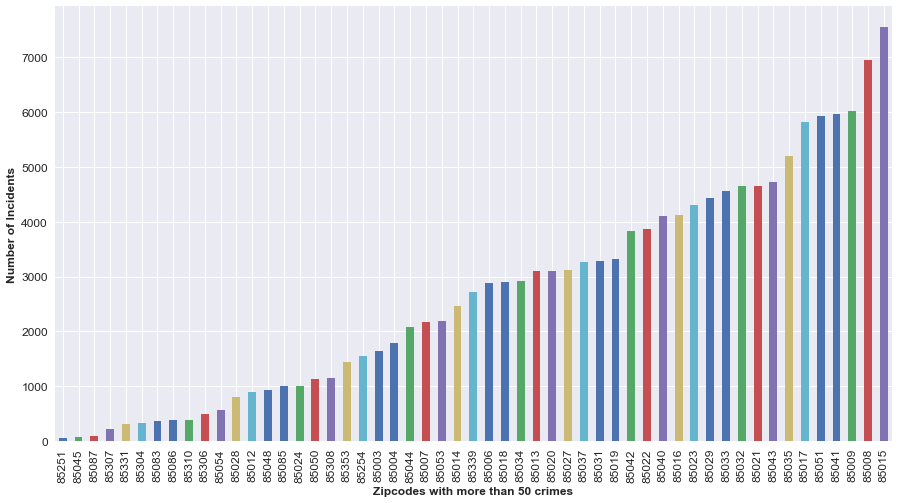

In [4]:
cutoff = 50
plt.figure(figsize=(15,8))
sd = df['zip'].value_counts(sort=True,ascending=True)
sd.index = sd.index.astype(int)
sd = sd[~(sd<cutoff)]
ax = sd.plot.bar()
ax.set_ylabel('Number of Incidents')
ax.set_xlabel('Zipcodes with more than '+str(cutoff)+' crimes')
plt.show()

## Crime monthly

/usr/local/lib/python3.5/site-packages/ipykernel_launcher.py:35: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


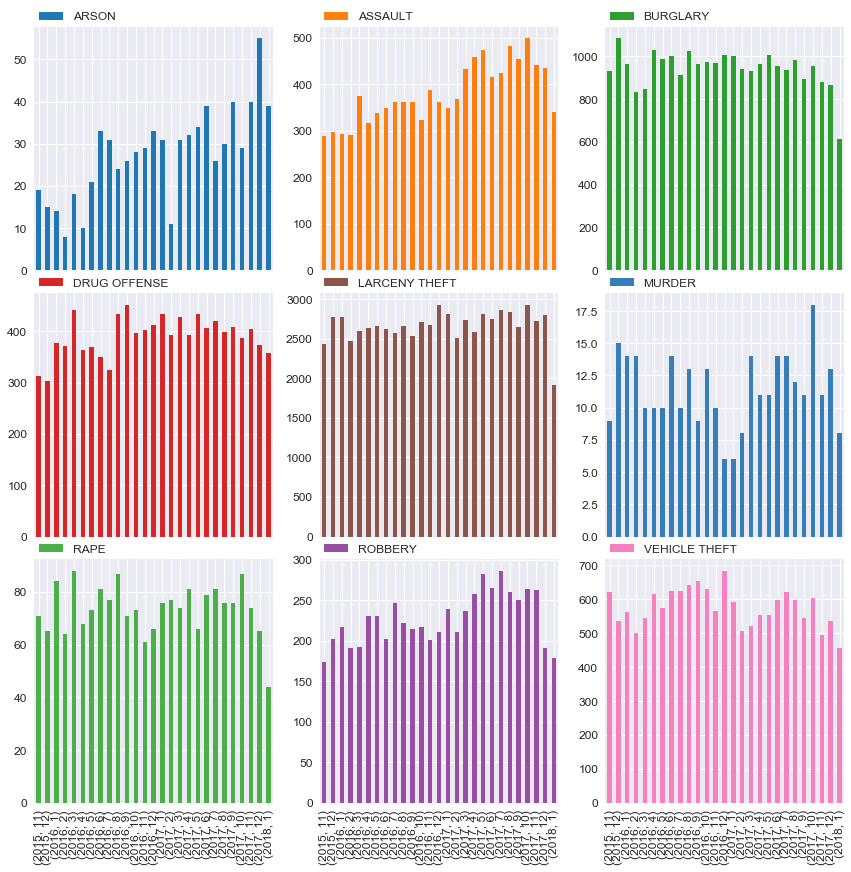

In [5]:
crime_year = pd.crosstab([df['year'],df['month']],df['crime'])

"""fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(12,6))
crime_year.plot(kind='bar', stacked=False, grid=False,ax=ax)
ax.set_ylabel("number of incidents")
ax.set_xlabel("year")
ax.legend(loc = (1,0.1))
ax.set_ylim(0,3000)
plt.tight_layout()
plt.show()"""

"""ax = crime_year.plot()
ax.set_ylabel("number of incidents")
ax.set_xlabel("year")
ax.legend(loc = (1,0.1))
ax.set_ylim(0,3000)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.tight_layout()
plt.show()"""

#sns.heatmap(crime_year.T)
#plt.show()

# a set of colors to plot the bars
color_sequence = ['#1f77b4', '#ff7f0e', '#2ca02c','#d62728','#8c564b',
                  '#377eb8','#4daf4a','#984ea3','#f781bf']

# create the figure
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12,12), sharex=True)
k=0
for i in range(0,3):
    for j in range(0,3):
        ax = axes[i,j]
        # selec kth columns
        crime_year_col = crime_year.ix[:,k]
        #plot the data with a selected color
        crime_year_col.plot(kind='bar', ax=ax, color=color_sequence[k])
        ax.legend(loc = (0,1))
        # rotate the x-axis ticks
        ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
        ax.set_xlabel('')
        k+=1
plt.tight_layout()
plt.show(fig)

In [6]:
#df.time = pd.to_datetime(df['datetime'], format='%m/%d/%Y %H:%M')

In [7]:
#df.head(5)

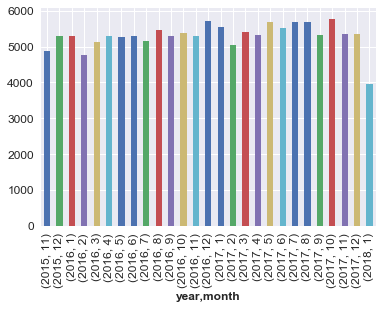

In [8]:
df.groupby(['year','month'])['crime'].count().plot(kind='bar')
plt.show()

## Weekly trends

To see weekly trends

| Crime | Highest | Lowest |
| --- | --- | --- |
| ARSON | Saturday (59) | Tuesday (27) |
| ASSAULT | Sunday (801) | Wednesday (636) |
| BURGLARY | Friday (2274) | Sunday (1383) |
| DRUG OFFENSE | Wednesday (1029) | Sunday (411) |
| LARCENY THEFT | Friday (5424) | Sunday (4655) |
| MURDER | Sunday (28) | Wednesday (15) |
| RAPE | Saturday (155) | Thursday (118) |
| ROBBERY | Wednesday (465) | Thursday (394) |
| VEHICLE THEFT | Friday (1221) | Thursday (1115) |

While assault increase going towards the weekend, while drug offense decreases. In fact, drug offense has its peak on wednesdays.

### Heatmap

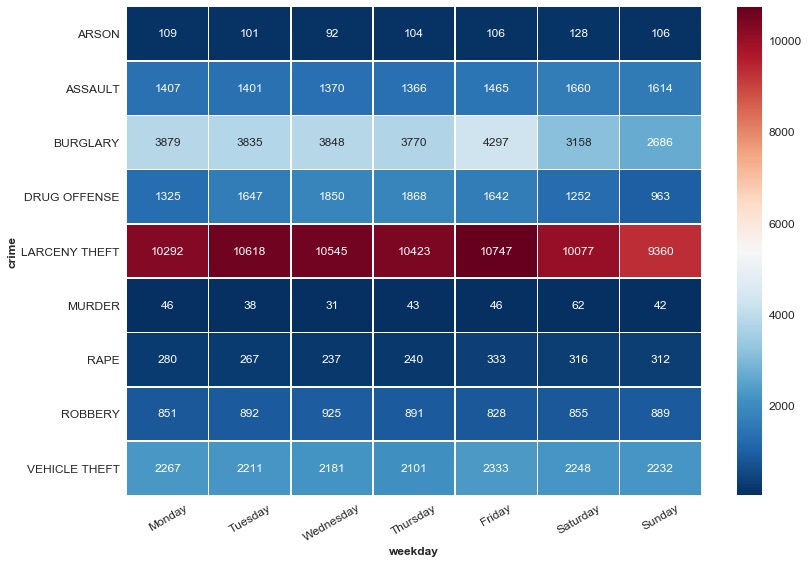

In [9]:
crime_weekday = pd.crosstab(df['weekday'],df['crime'])
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,8), sharex=True)
if seaborn_exists:
    daysOfWeekList = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    #daysOfWeekList = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
    crime_weekday=crime_weekday.reindex(daysOfWeekList)
    ax=sns.heatmap(crime_weekday.T,annot=True, fmt="d",linewidths=0.5,cmap='RdBu_r')
    ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
    plt.tight_layout()
    plt.savefig('heatmap.png')
    plt.show()

| Crime | Highest | Lowest |
| --- | --- | --- |
| ARSON | Saturday (128) | Wednesday (92) |
| ASSAULT | Saturday (1660) | Thursday (1366) |
| BURGLARY | Friday (4297) | Sunday (2686) |
| DRUG OFFENSE | Thursday (1868) | Sunday (963) |
| LARCENY THEFT | Friday (10747) | Sunday (9360) |
| MURDER | Saturday (62) | Wednesday (31) |


/usr/local/lib/python3.5/site-packages/ipykernel_launcher.py:10: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # Remove the CWD from sys.path while we load stuff.


| RAPE | Friday (333) | Wednesday (237) |
| ROBBERY | Wednesday (925) | Friday (828) |
| VEHICLE THEFT | Friday (2333) | Thursday (2101) |


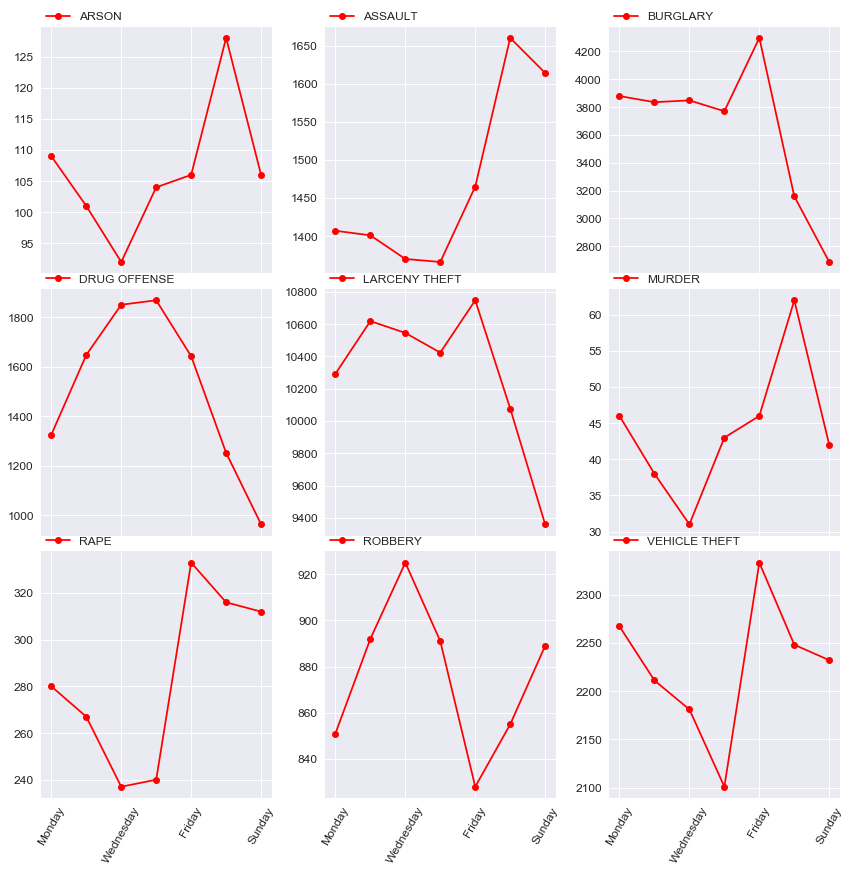

In [10]:
fig, axes = plt.subplots(nrows=3, ncols=3,figsize=(12,12),sharex=True)

print ('| Crime | Highest | Lowest |')
print ('| --- | --- | --- |')
k=0
for i in range(0,3):
    for j in range(0,3):
        ax = axes[i,j]
        # selec kth columns
        crime_weakday_col = crime_weekday.ix[:,k]
        
        crime_name = crime_weakday_col.name
        crime_max_label,crime_max_val = crime_weakday_col.idxmax(), crime_weakday_col.max()
        crime_min_label,crime_min_val = crime_weakday_col.idxmin(), crime_weakday_col.min()
        print ('| {} | {} ({}) | {} ({}) |'.format(crime_name,crime_max_label,crime_max_val,crime_min_label,crime_min_val))
        
        crime_weakday_col.plot(kind='line',ax=ax,color='r',marker='o')
        #crime_weakday_col.plot(kind='bar',ax=ax,color='r')
        ax.legend(loc = (0,1))
        ax.set_xticklabels(ax.get_xticklabels(),rotation=60)
        ax.set_xlabel('')
        k+=1
plt.tight_layout()
plt.show(fig)

## Month Days trend

/usr/local/lib/python3.5/site-packages/ipykernel_launcher.py:12: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if sys.path[0] == '':


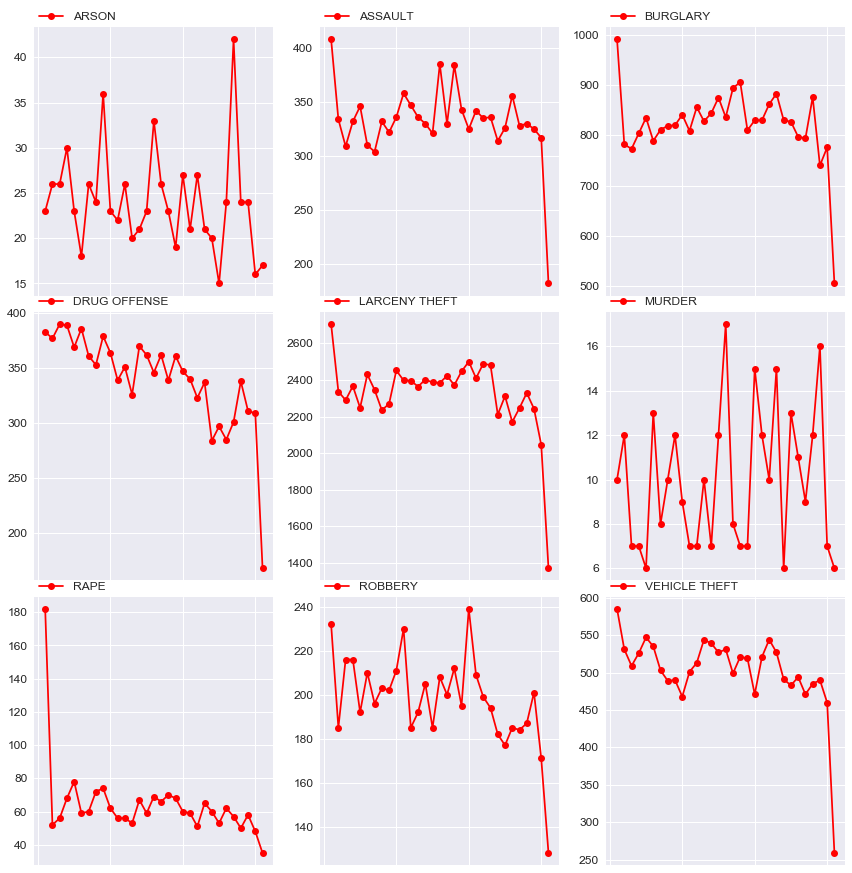

In [11]:
crime_monthday = pd.crosstab(df['day'],df['crime'])

fig, axes = plt.subplots(nrows=3, ncols=3,figsize=(12,12),sharex=True)

#print ('| Crime | Highest | Lowest |')
#print ('| --- | --- | --- |')
k=0
for i in range(0,3):
    for j in range(0,3):
        ax = axes[i,j]
        # selec kth columns
        crime_monthday_col = crime_monthday.ix[:,k]
        
        '''crime_name = crime_weakday_col.name
        crime_max_label,crime_max_val = crime_weakday_col.idxmax(), crime_weakday_col.max()
        crime_min_label,crime_min_val = crime_weakday_col.idxmin(), crime_weakday_col.min()
        print ('| {} | {} ({}) | {} ({}) |'.format(crime_name,crime_max_label,crime_max_val,crime_min_label,crime_min_val))'''
        
        crime_monthday_col.plot(kind='line',ax=ax,color='r',marker='o')
        ax.legend(loc = (0,1))
        ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
        ax.set_xlabel('')
        k+=1
plt.tight_layout()
plt.show(fig)

In [12]:
dg = pd.crosstab(df['date'],df['crime'])
for col in dg.columns:
    print (col)
    print (dg.sort_values(by=col,ascending=False).index[0:3])

ARSON
Index(['2017-12-27', '2018-01-16', '2016-11-14'], dtype='object', name='date')
ASSAULT
Index(['2018-01-01', '2017-08-10', '2017-04-16'], dtype='object', name='date')
BURGLARY
Index(['2017-05-01', '2016-12-13', '2017-01-20'], dtype='object', name='date')
DRUG OFFENSE
Index(['2017-01-19', '2016-03-03', '2017-02-02'], dtype='object', name='date')
LARCENY THEFT
Index(['2017-10-01', '2015-12-19', '2016-12-14'], dtype='object', name='date')
MURDER
Index(['2017-06-29', '2016-02-23', '2017-10-06'], dtype='object', name='date')
RAPE
Index(['2016-01-01', '2016-03-01', '2017-04-01'], dtype='object', name='date')
ROBBERY
Index(['2017-04-25', '2017-07-13', '2017-10-28'], dtype='object', name='date')
VEHICLE THEFT
Index(['2017-10-13', '2016-12-26', '2016-05-06'], dtype='object', name='date')


 check zipcodes , which crime more, local buisessnes. For example, does the location of bars have any correlation with car theft or rape?

In [13]:
daysOfWeekList = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
"""wdf = pd.crosstab(df['crime'],df['weekday'])[daysOfWeekList]
wdf.to_json('crime_weekly.json')
wdf.to_csv('crime_weekly.csv')"""

"wdf = pd.crosstab(df['crime'],df['weekday'])[daysOfWeekList]\nwdf.to_json('crime_weekly.json')\nwdf.to_csv('crime_weekly.csv')"

In [14]:
def save_crime(names):
    #make sure there is no white space in the filename
    for name in names:
        wdf = pd.crosstab(df['weekday'],df['crime'])[name]
        wdf = pd.DataFrame(wdf).reindex([daysOfWeekList])
        wdf.columns = ['count']
        wdf.to_csv('./crime_weekly/'+name.replace(" ", "_")+'.csv',sep=',')

In [15]:
save_crime(sorted(df.crime.unique())) # for all types of crimes, rem

In [16]:
sorted(df.crime.unique())

['ARSON',
 'ASSAULT',
 'BURGLARY',
 'DRUG OFFENSE',
 'LARCENY THEFT',
 'MURDER',
 'RAPE',
 'ROBBERY',
 'VEHICLE THEFT']